#📘 Bölüm 1: Görüntü Nedir?
Bir görüntü,aslında iki boyutlu sayılardan oluşan bir matristir.
.Piksel,görüntünün en küççük birimidir.
. Her piksel, bir yoğunluk değeri(intensity) tutar.
. Gri tonlu bir görüntüde her piksel 0-255 değeri arasındadır.
  . 0 = siyah
  . 255 = beyaz

Görüntü = I(x,y)
x = genişlik(width)
y = yükselik(height)

Gri Görüntü: 1 kanal (tek değer -> 0-255)
Renkli Görüntü(RGB): 3 kanal ->(Kırmızı ,Yeşil,Mavi)


Kullanılacak veri seti Fashion MNIST gri tonludur.

# 💻 BÖLÜM 2: FASHION MNIST VERİSİNİ İNCELEME

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# X girdi y ise sonuç veya tahmin etmek istediğimiz verilerdir.
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

# 10 sınıfı ele alalım
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 28 x 28 piksel resimlerimiz var
print("Eğitim verisi: ",x_train.shape)
print("Test verisi: ",x_test.shape)


Eğitim verisi:  (60000, 28, 28)
Test verisi:  (10000, 28, 28)


# 🖼️ BÖLÜM 3: GÖRSELLEŞTİRME

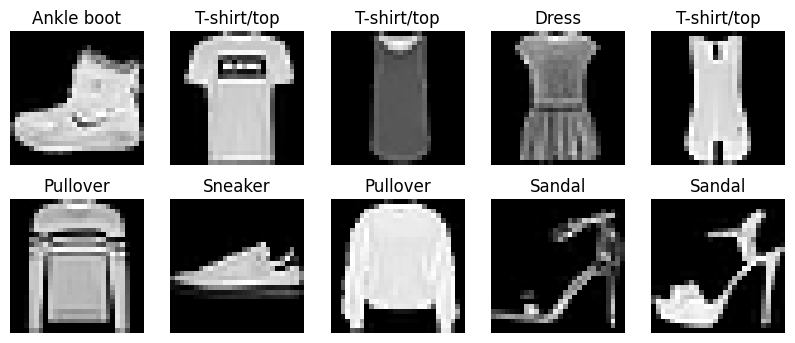

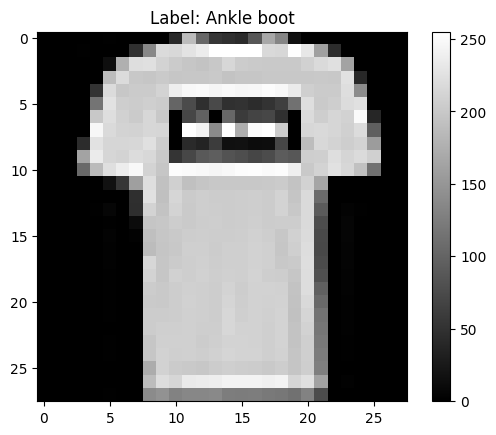

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
plt.figure(figsize=(10,4))

# İlk 10 veri
for i in range(10):

  # 2 satır 5 sütun
  plt.subplot(2,5,i+1)

  # İ'ninci görüntü
  plt.imshow(x_train[i],cmap="gray")

  # Etiketi yazıyor
  plt.title(classes[y_train[i]])
  plt.axis("off")

plt.show()

# Seçtiğimiz bir görüntüyü göstermesini istiyoruz
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {classes[y_train[1]]}")
plt.colorbar()
plt.show()

# 28 x 28 görüntünün ham piksel değerini yazdırıyoruz
# 0 siyah, 255 beyaz
print(x_train[1])

# ⚙️ BÖLÜM 4: TEMEL GÖRÜNTÜ İŞLEME TEKNİKLERİ

In [13]:
# Normalizasayon 0-255 değerleri ile değil 0-1 değerleri ile uğraşmak
# Hesaplamalar daha kararlı olur
# Algoritmalarımız daha iyi çalışır
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

#  4.1 Basit Eşikleme (Thresholding)

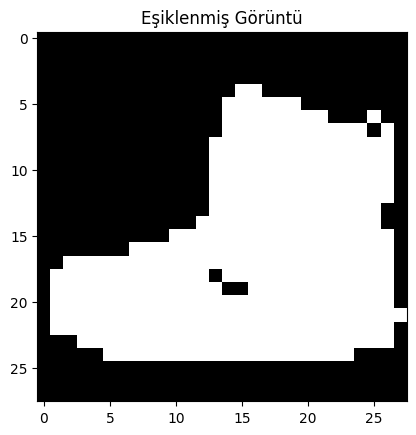

In [16]:
# Pikselin değeri 100 den büyük ise beyaz yap
#  Küçük ise siyah yap sadece 0 ve 255 ten oluşur
threshold =100

binary_iamge = (x_train[0]>threshold)*255

plt.imshow(binary_iamge,cmap="gray")
plt.title("Eşiklenmiş Görüntü")
plt.show()

# 4.2 Aynalama ve Döndürme

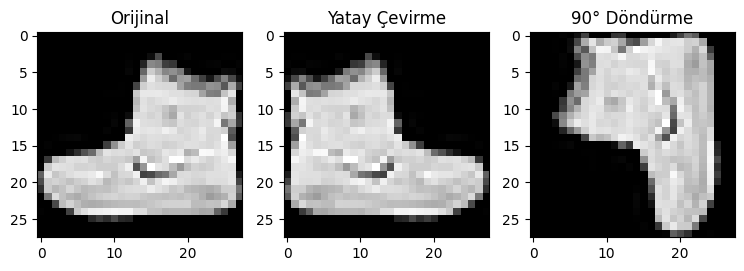

In [17]:
flipped = np.fliplr(x_train[0])   # Yatay çevirme
rotated = np.rot90(x_train[0])    # 90 derece döndürme

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(x_train[0], cmap='gray'); plt.title("Orijinal")
plt.subplot(1,3,2); plt.imshow(flipped, cmap='gray'); plt.title("Yatay Çevirme")
plt.subplot(1,3,3); plt.imshow(rotated, cmap='gray'); plt.title("90° Döndürme")
plt.show()


# 🧮 BÖLÜM 5: BASİT ANALİZLER

5.1 Ortalama Parlaklık

In [19]:
means = np.mean(x_train, axis=(1,2))
print("İlk 3 ortalama parlaklık:", means[:3])


İlk 3 ortalama parlaklık: [ 97.25382653 107.90561224  36.55867347]


 5.2 En Parlak ve En Karanlık Görüntüleri Bul

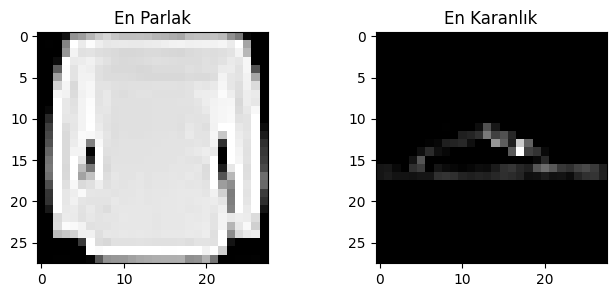

In [20]:
brightest = np.argmax(means)
darkest = np.argmin(means)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.imshow(x_train[brightest], cmap='gray'); plt.title("En Parlak")
plt.subplot(1,2,2); plt.imshow(x_train[darkest], cmap='gray'); plt.title("En Karanlık")
plt.show()
